# Case Study

- The data comprises of 13 columns and 310 observations.
- 12 columns are numerical attributes of the spine/ back. 
- The last column is the Status of the patient - Abnormal indicates presence of Back pain and Normal indicates no back pain.
- The intent is to predict the Status based on the 12 variables. 



In [1]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
back_data = pd.read_csv("backpain.csv")

In [3]:
back_data.head(10)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal,Attribute1 = pelvic_incidence (numeric)
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal,Attribute2 = pelvic_tilt (numeric)
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal,Attribute3 = lumbar_lordosis_angle (numeric)
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal,Attribute4 = sacral_slope (numeric)
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal,Attribute5 = pelvic_radius (numeric)


## Unnamed column names

 - There is an additional column with notes about the names of each of the individual attributes. This is removed.
 - The columns are not named in the dataset. Adding the column names to each of the corresponding columns. 

In [4]:
del back_data['Unnamed: 13']
back_data.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Status']

In [5]:
back_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


## Initial Data Exploration
 - Checking if there are any missing values in the dataset. Turns out there aren't any.
 - Checking the frequency of the different values of the Status column. Abnormal is 210 of the 310 observations. This means that it is not really an unbalanced dataset.

In [6]:
back_data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

In [7]:
back_data.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [8]:
back_data.Status.describe()

count          310
unique           2
top       Abnormal
freq           210
Name: Status, dtype: object

In [9]:
back_data.Status.value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

<AxesSubplot:>

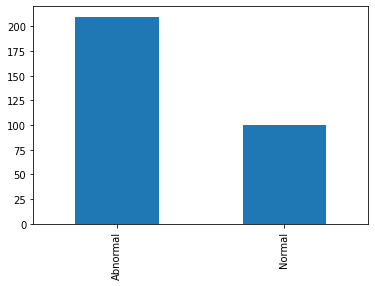

In [10]:
back_data.Status.value_counts().plot(kind='bar')

## Multi Collinearity check
 - Checking if the individual columns are correlated with each other. In which case, they might end up having the same predictive power or explaining the same variation in the dependent variable. 
 - The correlation matrix/ plot is a good way to establish multi collinearity between the dependent variables. Anything closer to +- 1 indicates high correlation between those two predictor variables.
 - We can observe from the plot that pelvic_incidence is highly correlated with pelvic tilt, sacral slope, degree spondylolisthesis and lumbar lordosis angle.

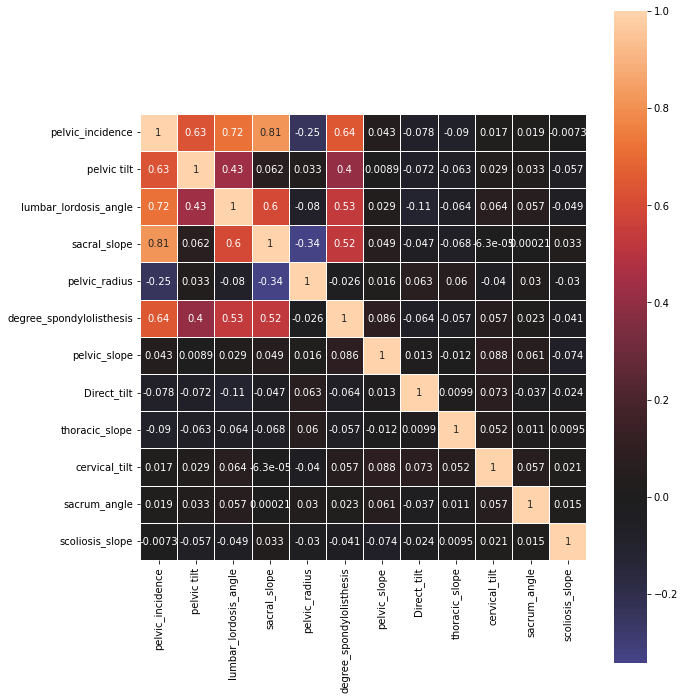

In [11]:
corr_back = back_data.corr()
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
#mask = np.zeros_like(corr_back, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
plt.figure(figsize = [10,12])
sns.heatmap(corr_back, annot= True,center=0, square=True, linewidths=.5)

plt.show()

In [11]:
# pelvic_incedence has high linear correlation with pelvic tilt, lumbar_lordosis_angle,
# sacral_slope, degree_of_spondelithesis

In [12]:
# Seeing the correlation values
corr_back

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


In [13]:
back_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


## Bi-variate analysis - Relation of each predictor with Target variable

The status column has two values - 'Abnormal' and 'Normal'. We would like to explore how each of the 12 predictor variables vary with respect to the Status value. We would be more interested in those predictor variables which have a noticeable difference in their values corresponding to 'Normal' and 'Abnormal'. 

We calculate the mean/ median of values corresponding to Normal and Abnormal for each of the predictor variables. Some observations:

 - The first six variables have noticeable difference in the means corresponding to Normal and Abnormal.
 - The mean corresponding to Abnormal for degree_spondylolisthesis is quite higher than the corresponding median. Could be due to outliers.
 - pelvic_radius has lower values for Abnormal as compared to Normal.

In [12]:
back_data.groupby('Status').mean()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019


In [13]:
back_data.groupby('Status').median()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Status,,,,,,,,,,,,
Abnormal,65.274888,18.798899,56.150000,44.639597,115.650323,31.946516,0.501280,21.7506,12.77005,11.973735,-14.892070,24.50940
Normal,50.123115,13.482435,42.638923,37.059694,123.874328,1.152710,0.418732,22.4146,13.40975,11.330750,-13.974694,27.72795


In [16]:
## Inferences:
## The difference in mean and median values with respect to Status
## for the following features is very high
## pelvic_incidence	pelvic tilt	lumbar_lordosis_angle	
## sacral_slope	pelvic_radius	degree_spondylolisthesis
## THis indicates that the back pain can be classified using these features mainly.

### Box Plots
To visualise the above data exploration, we make use of Box Plots as we are comparing Categorical and continuous variables.

A couple of observations which jump out:
 - For the variable degree_spondilolisthesis, 'Normal' status clearly has a much lower range of values as compared to 'Abnormal'. Also shows the presence of a distant outlier. Not removing the outlier - as without domain knowledge, it would be hard to interpret whether it is an incorrect or a rare value.
 - For the variable 'Pelvic Radius' while 'Abnormal' has a much higher range of values, the median value of 'Abnormal' is lower than the median values of 'Normal'.

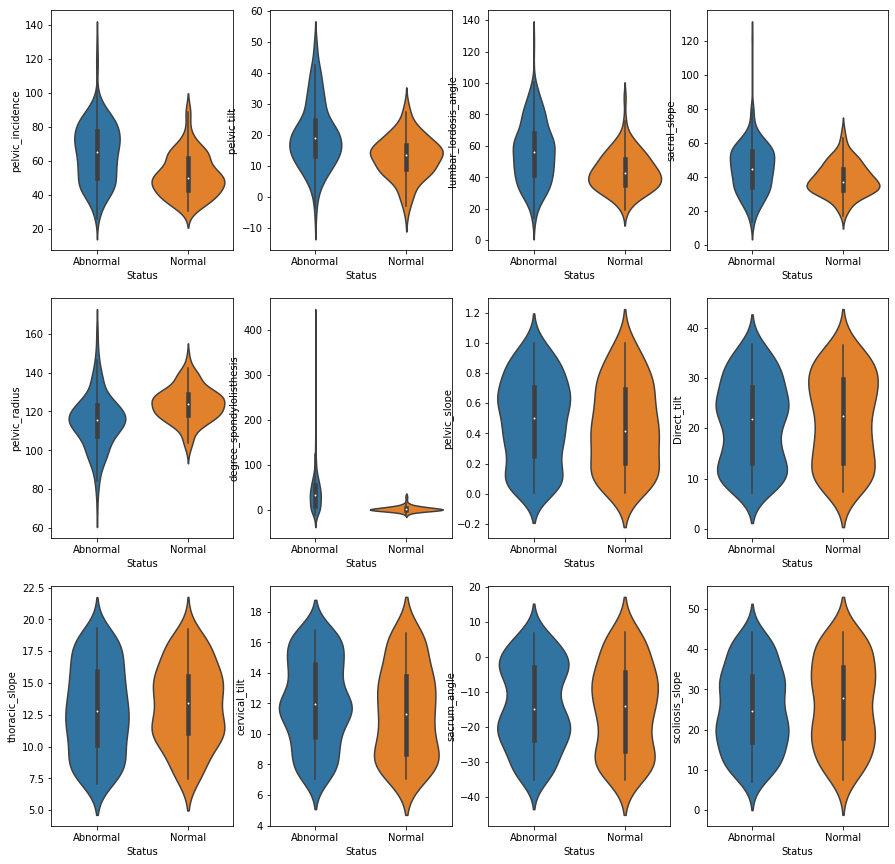

In [14]:
## Generating 3*4 matrix of box plots

fig, axes = plt.subplots(3, 4, figsize = (15,15))
axes = axes.flatten()

for i in range(0,len(back_data.columns)-1):
    sns.violinplot(x="Status", y=back_data.iloc[:,i], data=back_data, orient='v', ax=axes[i])

#plt.tight_layout()
plt.show()

In [18]:
## Inferences:
## pelvic_slope, direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope do not have
## much difference in distribution with respect to normal and abnormal back pain.

## Outlier detection
## For the features pelvic_incidence	pelvic tilt	lumbar_lordosis_angle	sacral_slope	
## pelvic_radius and degree_spondelethisis has outliers in abnormal back pain categories. These values are 
## important to detect back pain's status. We will not remove outliers at this level.

### Pairplot 

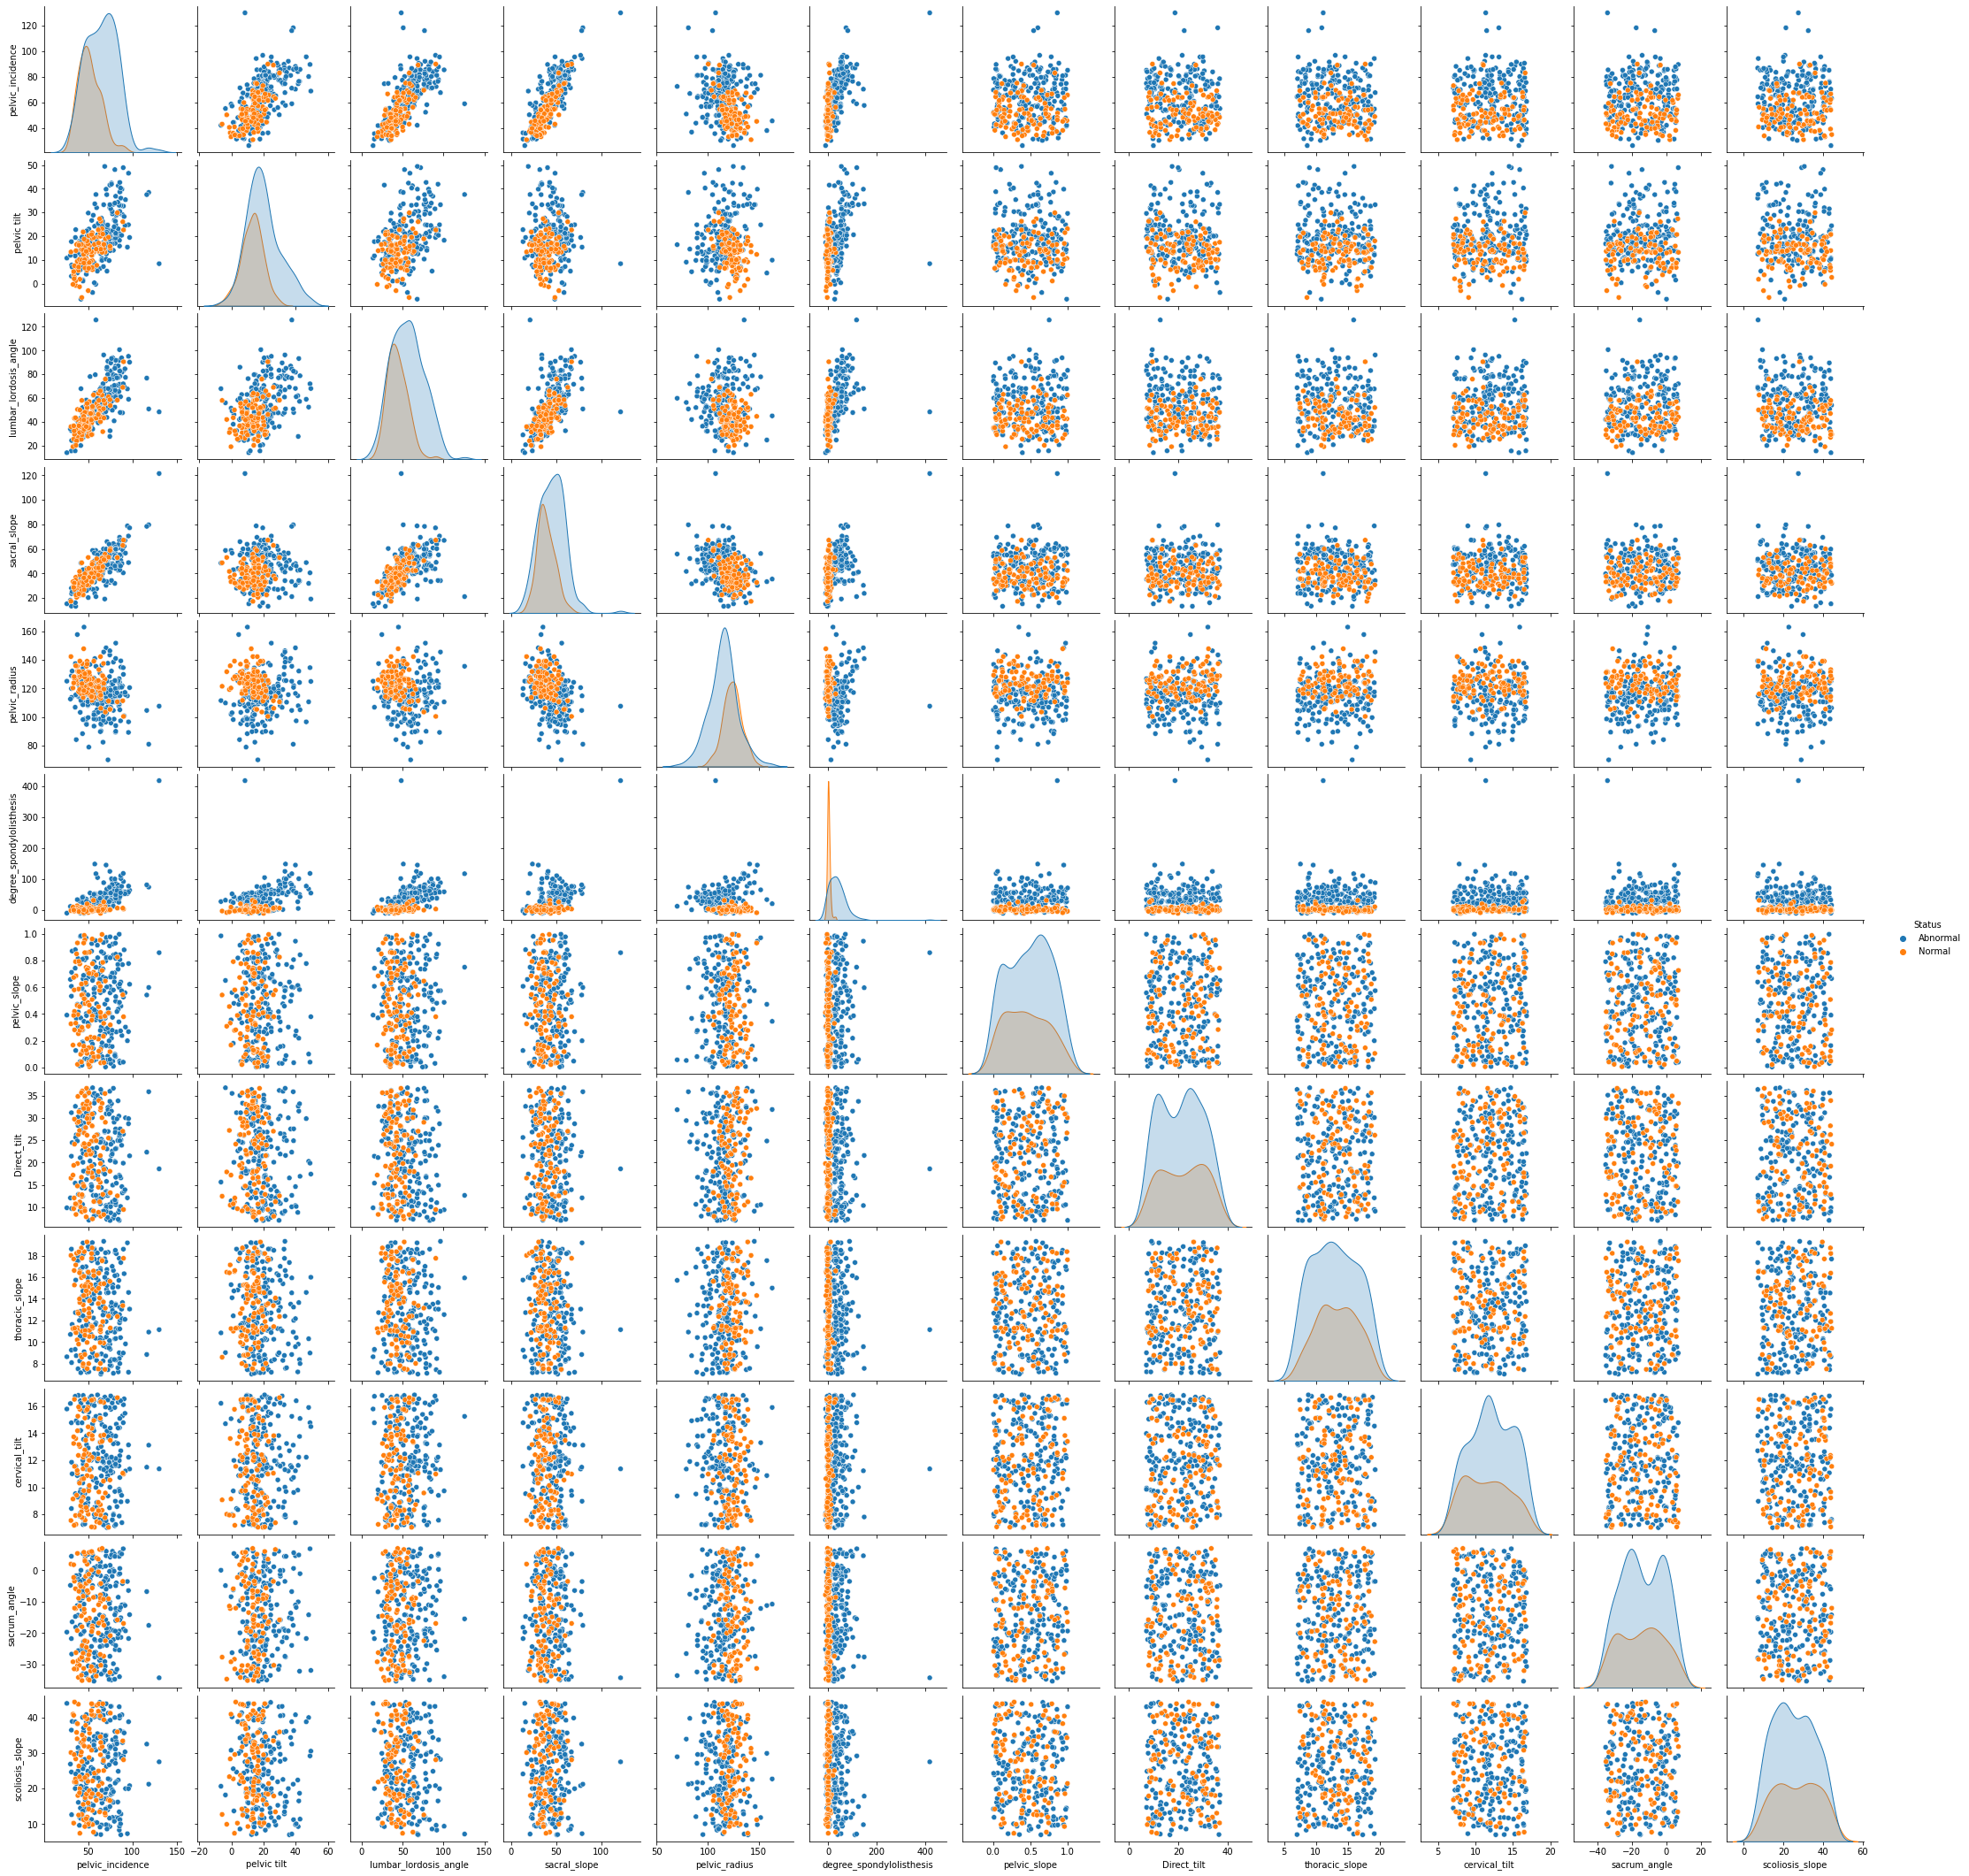

In [15]:
sns.pairplot(back_data, hue = 'Status')

In [20]:
## Inferences:
## There are features like degree_spondelithesis, pelvic_radius,sacral_slope, pelvic_incidence	pelvic tilt,	lumbar_lordosis_angle	
## have well seperation of distribution wrt the target variable i.e. Status of back pain

## Final processing

 - For modelling purpose, we map all the predictor variables to a array X and the target variable to an array Y. 
 - The class labels 'Abnormal' and 'Normal' are numerically encoded to 1 and 0. While this is not necessary as the sklearn module can handle it internally, it is convenient for graphing the Receiver Operating curve (if required).
 - The variables are subjected to Standardization (mean zero and unit variance) before being fed to the model.

In [21]:
#back_data.loc[back_data.Status =='Abnormal','Status']=1

In [16]:
back_data.loc[back_data.Status=='Abnormal','Status'] = 1
back_data.loc[back_data.Status=='Normal','Status'] = 0

In [17]:
X = back_data.drop('Status',axis=1)
y=back_data['Status']

In [18]:
back_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1


In [19]:
y.dtypes

dtype('O')

In [20]:
y = y.astype('int')

## Modelling and Feature Interpretation

 - Implementing a logistic regression classifier with a train test split in a 70:30 ratio. 
 - The fitted model when applied on the test data returns an accuracy of 81.7%. 

In [45]:
def data_preprocess(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    train_scaled = scaler.transform(X_train)
    test_scaled = scaler.transform(X_test)
    train_scaled = pd.DataFrame(train_scaled, columns = X.columns).reset_index(drop=True)
    test_scaled = pd.DataFrame(test_scaled, columns = X.columns).reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return(train_scaled, test_scaled, y_train, y_test)

In [22]:
def performance(y,X,model):
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print("AUC score:", roc_auc_score(y,ypred_prob))

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
def roc_plot(model,X,y,label):
    
    y_pred = model.predict_proba(X)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y, y_pred)

    # add the AUC score to the plot
    auc_score = roc_auc_score(y, y_pred)

    # plot the ROC curve
    plt.plot(fpr, tpr, label=label+' (AUC Score = %0.4f)' % auc_score)
    #plt.plot(fpr,tpr,label = label+'AUC Score='+str(auc_score))

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    
    # set the position of legend
    plt.legend(loc = 'lower right')

    # plot the grid
    plt.grid(True)

In [23]:

#X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

logreg_result = LogisticRegression()
logreg_result.fit(X_train, y_train)


LogisticRegression()

Training performance
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        66
           1       0.89      0.89      0.89       151

    accuracy                           0.85       217
   macro avg       0.83      0.83      0.83       217
weighted avg       0.85      0.85      0.85       217

AUC score: 0.9255468593216938


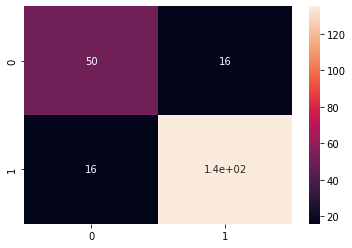

In [26]:
print("Training performance")
performance(y_train,X_train,logreg_result)

Testing performance
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        34
           1       0.88      0.97      0.92        59

    accuracy                           0.89        93
   macro avg       0.90      0.87      0.88        93
weighted avg       0.90      0.89      0.89        93

AUC score: 0.9586241276171485


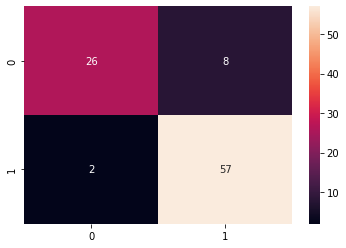

In [27]:
print("Testing performance")
performance(y_test,X_test,logreg_result)

In [40]:
# We can seee that, the testing performance is slightly higher than training. The model has variance.


In [33]:
model_list = ['Base LR']
performance_list = [0.89]

In [37]:
X_train_scaled, X_test_scaled, y_train, y_test=data_preprocess(X,y)
X_train_scaled.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.677424,0.449910,0.408862,0.547960,-1.201513,0.069034,-1.535690,-0.656570,0.510810,-0.210738,-0.421709,-0.533835
1,-0.623678,-1.087441,0.299532,0.037792,-1.769610,0.224565,-0.256186,1.154789,-0.496157,-0.248688,-1.020525,1.498023
2,3.280423,1.967457,1.315766,2.823639,-1.074576,1.721255,0.232278,0.115405,-1.335917,-0.200404,0.546742,0.693020
3,-0.500044,1.223100,-0.779000,-1.657181,0.697312,-0.613951,-1.565613,1.741484,0.244453,0.293877,-1.409457,0.614736
4,1.770695,1.505696,1.641631,1.166730,0.822200,2.056359,0.178758,0.591512,1.662351,1.402924,-0.440370,1.018893


In [29]:
logreg_result = logreg_result.fit(X_train_scaled,y_train)

In [30]:
print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.848
Test set score: 0.871


Training Performance
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        66
           1       0.88      0.90      0.89       151

    accuracy                           0.85       217
   macro avg       0.82      0.81      0.82       217
weighted avg       0.85      0.85      0.85       217

AUC score: 0.9359823399558499


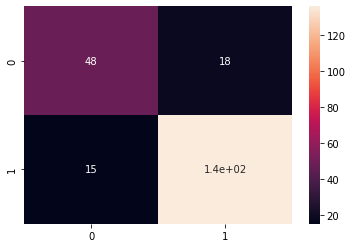

In [31]:
print("Training Performance")
performance(y_train,X_train_scaled,logreg_result)

Testing Performance
              precision    recall  f1-score   support

           0       0.96      0.68      0.79        34
           1       0.84      0.98      0.91        59

    accuracy                           0.87        93
   macro avg       0.90      0.83      0.85        93
weighted avg       0.88      0.87      0.86        93

AUC score: 0.9626121635094715


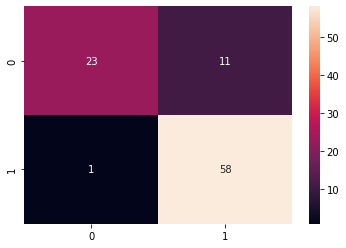

In [46]:
print("Testing Performance")
performance(y_test,X_test_scaled,logreg_result)

In [34]:
model_list.append('LR_scaled')
performance_list.append(0.87)

In [35]:
logreg_result.coef_

array([[-0.15992856,  0.65846185, -0.08541212, -0.74530467, -1.04459526,
         3.36237759, -0.01598914,  0.01583883, -0.19534154,  0.16017971,
         0.11218761, -0.11146215]])

In [48]:
## The performance of the model is almost same fo scaled and unscaled data

## To explain or to predict

 - While the previous model implemented was good in predicting the Target variable on a test set, we did not interpret anything about the individual features - which variable(s) influence the Target variable more. 
 - Since this is a medical dataset, there could be a need for explaining the effect of individual variables on the response variable. Hence it would be a good idea to explore the model co-efficients of the predictor variables to see how well each of them influence the response. 
 - Let us attempt this in the next section.

In [43]:
X_train_scaled.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
0,0.677424,0.449910,0.408862,0.547960,-1.201513,0.069034,-1.535690,-0.656570,0.510810,-0.210738,-0.421709,-0.533835
1,-0.623678,-1.087441,0.299532,0.037792,-1.769610,0.224565,-0.256186,1.154789,-0.496157,-0.248688,-1.020525,1.498023
2,3.280423,1.967457,1.315766,2.823639,-1.074576,1.721255,0.232278,0.115405,-1.335917,-0.200404,0.546742,0.693020
3,-0.500044,1.223100,-0.779000,-1.657181,0.697312,-0.613951,-1.565613,1.741484,0.244453,0.293877,-1.409457,0.614736
4,1.770695,1.505696,1.641631,1.166730,0.822200,2.056359,0.178758,0.591512,1.662351,1.402924,-0.440370,1.018893


In [42]:
y_train

126    1
125    1
163    1
52     1
61     1
      ..
211    0
67     1
25     1
196    1
175    1
Name: Status, Length: 217, dtype: int32

In [47]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)
X_train_const = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_const).fit()

print(logit_model.summary())

         Current function value: 0.289269
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           12
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                  0.5291
Time:                        12:32:54   Log-Likelihood:                -62.771
converged:                      False   LL-Null:                       -133.31
Covariance Type:            nonrobust   LLR p-value:                 3.625e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.4358      0.613      5.602      0.000       2.234       4.638
pelvic_incidence       

In [50]:
# Inference for pelvic_radius
# log of odds of back_pain decreases by 1.35 per unit increase in pelvic_radius
# Alternatively we can write
# odds of back_pain change in the multiple of e^5.5 per unit increase in degree_spondelithesis

In [51]:
# pelvic_radius and degree_spondylolisthesis are significant features, based on p_value

In [52]:
# The model is significant as p_values is less 0.05

## Understanding the model result summary

 - The above model did not converge because some variables were highly correlated with each other and this would have led to the correlation/ covariance matrix to be singular. 
 - A matrix can become singular if any rows(columns) can be expressed as a linear combination of any other rows (columns). 
 - In fact, it was very intersting to note that in our data, the Pelvic Incidence column values are an exact sum of Pelvic Tilt and Sacral Slope. So that explains.
 - Also in our statistical test results, the Standard error values are very high and p-value is 1 for these three variables. Hence we will remove them and re run the model. 

### Verify the Multicollinearilty 

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,inf,pelvic_incidence
1,inf,pelvic tilt
2,19.443921,lumbar_lordosis_angle
3,inf,sacral_slope
4,34.370439,pelvic_radius
5,2.436405,degree_spondylolisthesis
6,3.811737,pelvic_slope
7,7.225984,Direct_tilt
8,15.107876,thoracic_slope
9,16.778145,cervical_tilt


In [61]:
#Removing the highly correlated variables which also had high standard error
X = back_data.drop(['pelvic tilt', 'sacral_slope','Status'],axis =1)
#X = back_data[cols_to_include]
X.columns

Index(['pelvic_incidence', 'lumbar_lordosis_angle', 'pelvic_radius',
       'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt',
       'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope'],
      dtype='object')

In [62]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

logreg_result = LogisticRegression()
logreg_result.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

Training set score: 0.811
Test set score: 0.828


In [63]:
corr_model =sm.Logit(y_train,sm.add_constant(X_train_scaled)).fit()
corr_model.summary() # overfit model

Optimization terminated successfully.
         Current function value: 0.330698
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                           10
Date:                Thu, 11 Jan 2024   Pseudo R-squ.:                  0.4617
Time:                        13:03:11   Log-Likelihood:                -71.761
converged:                       True   LL-Null:                       -133.31
Covariance Type:            nonrobust   LLR p-value:                 1.188e-21
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8610      0.566      5.052      0.000       1.751       3.971
pelvic_incidence            -0.1766      0.477     -0.370      0.711      -1.112       0.759
lumbar_lordosis_angle       -0.8711      0.490     -1.777      0.076      -1.832       0.090
pelvic_radius               -1.2401      0.352     -3.528      0.000      -1.929      -0.551
degree_spondylolisthesis     4.6834      0.862      5.431      0.000       2.993       6.373
pelvic_slope                -0.0796      0.213     -0.374      0.708      -0.497       0.337
Direct_tilt                 -0.0543      0.210     -0.258      0.796      -0.466       0.358
thoracic_slope              -0.2493      0.216     -1.157      0.247      -0.672       0.173
cervical_tilt                0.1970      0.219      0.899      0.368      -0.232       0.626
sacrum_angle                 0.1255      0.211      0.593      0.553      -0.289       0.540
scoliosis_slope             -0.1971      0.205     -0.959      0.337      -0.600       0.206
============================================================================================
"""

## Model convergence
- The model has now converged after removing the highly correlated variables.
- There are a few predictors with p-values less than 0.05 (assuming a 95% confidence level). Let us consider only those predictors and re run the model

In [66]:
# considering only the variables which have p-value less than 0.05
X_trim_1 = back_data.loc[:,['pelvic_radius','degree_spondylolisthesis']]

## Final Model Selection

- The test result below indicate that there is a marginal increase in predictive power - the accuracy on the test set has increased from 74% to 77%. 
- This can be our final chosen model (even though Variable 1 - lumbar_lordosis_angle has a p-value marginally greater than 0.05). 


In [67]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X_trim_1,y)

logreg_result = LogisticRegression()
logreg_result = logreg_result.fit(X_train_scaled, y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train_scaled,y_train)))
print("Test set score: {:.3f}".format(logreg_result.score(X_test_scaled,y_test)))

AttributeError: 'list' object has no attribute 'reset_index'

In [58]:
logreg_result.intercept_

array([1.95314832])

In [59]:
logreg_result.coef_

array([[-0.91071116,  2.57085609]])

In [60]:
y_prob=logreg_result.predict_proba(X_train_scaled)
y_prob[0:5]

array([[3.82409782e-02, 9.61759022e-01],
       [1.56412891e-02, 9.84358711e-01],
       [6.37782609e-04, 9.99362217e-01],
       [5.64705464e-01, 4.35294536e-01],
       [1.51478535e-03, 9.98485215e-01]])

In [61]:
X_test_scaled = sm.add_constant(X_test_scaled)
X_test_scaled.shape

(93, 3)

In [ ]:
X_train_scaled.shape

In [51]:
X_train_scaled=sm.add_constant(X_train_scaled)
logit_model=sm.Logit(y_train,X_train_scaled)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.361171
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                            2
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.4121
Time:                        11:43:34   Log-Likelihood:                -78.374
converged:                       True   LL-Null:                       -133.31
Covariance Type:            nonrobust   LLR p-value:                 1.384e-24
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.6512      0.557      4.764      0.000       1.560

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.5291
Time:                        16:03:27   Log-Likelihood:                -62.771
converged:                      False   LL-Null:                       -133.31
Covariance Type:            nonrobust   LLR p-value:                 3.625e-24
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.4358      0.613      5.602      0.000       2.234       4.638
pelvic_incidence            -0.8361        nan        nan        nan         nan         nan
pelvic tilt                  1.3009        nan        nan        nan         nan         nan
lumbar_lordosis_angle       -0.2405      0.542     -0.443      0.657      -1.303       0.822
sacral_slope                -0.6897        nan        nan        nan         nan         nan
pelvic_radius               -1.3568      0.363     -3.742      0.000      -2.067      -0.646
degree_spondylolisthesis     5.5250      0.946      5.842      0.000       3.671       7.379
pelvic_slope                -0.0824      0.229     -0.360      0.719      -0.531       0.366
Direct_tilt                  0.0078      0.229      0.034      0.973      -0.441       0.456
thoracic_slope              -0.2780      0.232     -1.196      0.232      -0.734       0.178
cervical_tilt                0.1826      0.234      0.781      0.435      -0.276       0.641
sacrum_angle                 0.1490      0.235      0.635      0.525      -0.311       0.609
scoliosis_slope             -0.1469      0.225     -0.654      0.513      -0.587       0.293
============================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [63]:
y=result.predict(X_test_scaled)

ValueError: shapes (93,3) and (13,) not aligned: 3 (dim 1) != 13 (dim 0)

In [64]:
# Use following code to convert y probabilities to class labels
y = [0 if x<0.5 else 1 for x in y]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y,y_test))
print(classification_report(y,y_test))

## Interpreting the causative power of the predictors

- Now that we have decided on our final model, let us interpret the co-efficient estimates of the three predictor variables from the above statistical summary. 
    - Both lumbar_lordosis_angle and pelvic_radius have a negative co-efficient indicating that for every unit increase in the values of these variables, the log of odds of the Status being Abnormal decreases. 
    - degree_spondylolisthesis has a positive relationship with Abnormal status i.e for every unit increase in the value of degree_spondylolisthesis the log of odds of the Status being Abnormal increases.

## Sensitivity and Specificity

From the confusion matrix, we can calculate the Sensitivity True Positive/ (True positive + False Negative) and Specificity - True Negative / (True Negative + False Positive). 
Sensitivity = 74.6% and Specificity = 76.6%

I am not quite sure in this specific problem context, which one should be given more importance (or should have a higher value). 

In [ ]:
from sklearn import metrics
from sklearn.metrics import  roc_curve
from sklearn.metrics import roc_auc_score
y_pred_proba = result.predict(X_test_scaled)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr1,tpr1,label="data 1, auc="+str(auc1))
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],color = 'r')
plt.legend(loc=4)
plt.show()

In [64]:
X=back_data.drop('Status',axis=1)
y=back_data['Status']
y = y.astype('int')
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y) 

In [65]:
X_train_scaled, X_test_scaled, y_train, y_test = data_preprocess(X,y)

In [63]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          217 non-null    float64
 1   lumbar_lordosis_angle     217 non-null    float64
 2   pelvic_radius             217 non-null    float64
 3   degree_spondylolisthesis  217 non-null    float64
 4   pelvic_slope              217 non-null    float64
 5   Direct_tilt               217 non-null    float64
 6   thoracic_slope            217 non-null    float64
 7   cervical_tilt             217 non-null    float64
 8   sacrum_angle              217 non-null    float64
 9   scoliosis_slope           217 non-null    float64
 10  Status                    217 non-null    float64
dtypes: float64(11)
memory usage: 18.8 KB


In [64]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        66
           1       0.94      0.81      0.87       151

    accuracy                           0.83       217
   macro avg       0.81      0.85      0.82       217
weighted avg       0.86      0.83      0.84       217

AUC score: 0.9210315071242223


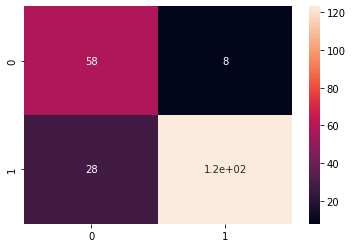

In [65]:
performance(y_train,X_train_scaled,DT_model)

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        34
           1       0.86      0.85      0.85        59

    accuracy                           0.82        93
   macro avg       0.80      0.81      0.80        93
weighted avg       0.82      0.82      0.82        93

AUC score: 0.8923230309072782


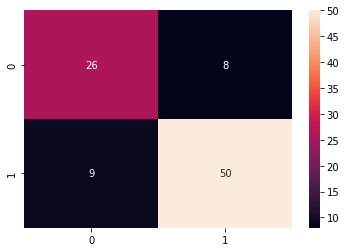

In [66]:
performance(y_test,X_test_scaled, DT_model)

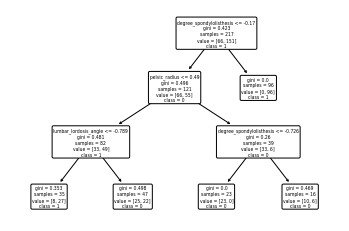

In [67]:
from sklearn import tree
tree.plot_tree(DT_model, feature_names=X_train_scaled.columns, rounded=True,class_names=['0','1'])
plt.show()

In [ ]:
### Inferences

In [69]:
imp=DT_model.feature_importances_
imp

array([0.        , 0.07595679, 0.21411458, 0.70992863, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [76]:
df_imp = pd.DataFrame(zip(X_train_scaled.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

,column,importance
3,degree_spondylolisthesis,0.709929
2,pelvic_radius,0.214115
1,lumbar_lordosis_angle,0.075957
0,pelvic_incidence,0.000000
4,pelvic_slope,0.000000
5,Direct_tilt,0.000000
6,thoracic_slope,0.000000
7,cervical_tilt,0.000000
8,sacrum_angle,0.000000
9,scoliosis_slope,0.000000


<AxesSubplot:xlabel='importance', ylabel='column'>

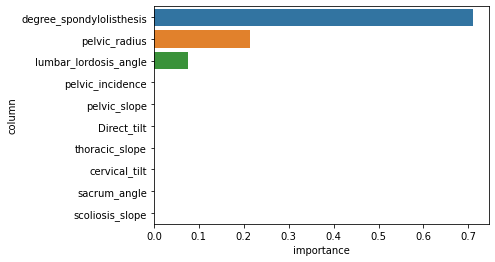

In [77]:
sns.barplot(y = 'column', x='importance', data = df_imp )


In [ ]:
# Inferences
# DT is fitting optimally with max_dapth = 3
# The performance on the test data 0.77, which is in accetable range
# The model has variance
# the important features identified by the model are degree_spondelithesis, lumbar_lordosis_angle
# and pelvic tilt

In [75]:
model_list.append('DT')
performance_list.append(0.82)

In [96]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train_scaled, y_train);
rf

RandomForestClassifier(n_estimators=10, random_state=42)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.99      1.00       151

    accuracy                           1.00       217
   macro avg       0.99      1.00      0.99       217
weighted avg       1.00      1.00      1.00       217

AUC score: 0.9999498294200281


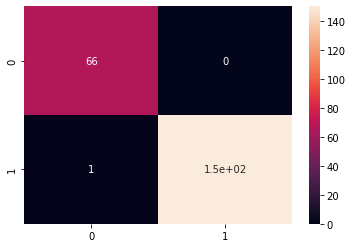

In [97]:
performance(y_train,X_train_scaled,rf)

              precision    recall  f1-score   support

           0       0.81      0.62      0.70        34
           1       0.81      0.92      0.86        59

    accuracy                           0.81        93
   macro avg       0.81      0.77      0.78        93
weighted avg       0.81      0.81      0.80        93

AUC score: 0.9152542372881356


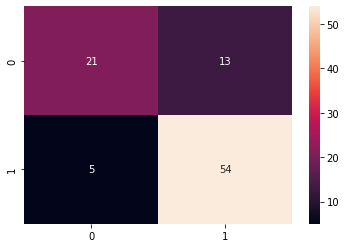

In [98]:
performance(y_test,X_test_scaled,rf)

In [99]:
model_list.append('RF')
performance_list.append(0.81)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        66
           1       0.89      0.93      0.91       151

    accuracy                           0.87       217
   macro avg       0.85      0.83      0.84       217
weighted avg       0.86      0.87      0.86       217

AUC score: 0.9214830423439695


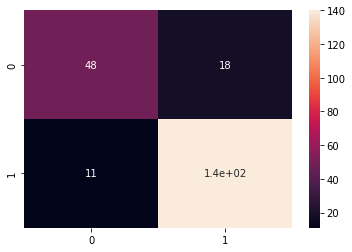

In [101]:
performance(y_train,X_train_scaled,model)

              precision    recall  f1-score   support

           0       0.73      0.56      0.63        34
           1       0.78      0.88      0.83        59

    accuracy                           0.76        93
   macro avg       0.75      0.72      0.73        93
weighted avg       0.76      0.76      0.76        93

AUC score: 0.8432203389830508


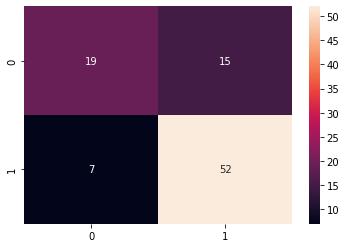

In [102]:
performance(y_test,X_test_scaled,model)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

In [103]:
from sklearn.model_selection import RandomizedSearchCV
parameters = dict ( n_neighbors = [1,3,5,7,9,11,13,15], p = [2,3,4,5,6,7])
RS_model = RandomizedSearchCV(model, parameters,cv =5,scoring = 'roc_auc')
RS_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15],
                                        'p': [2, 3, 4, 5, 6, 7]},
                   scoring='roc_auc')

In [105]:
best_param=RS_model.best_params_
best_param

{'p': 3, 'n_neighbors': 15}

In [106]:
model = KNeighborsClassifier(p=3, n_neighbors=15)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=15, p=3)

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        66
           1       0.84      0.91      0.87       151

    accuracy                           0.81       217
   macro avg       0.79      0.75      0.76       217
weighted avg       0.81      0.81      0.80       217

AUC score: 0.890728476821192


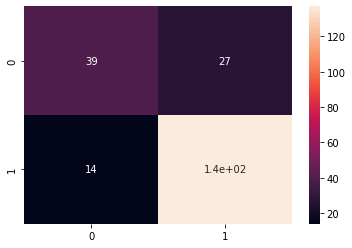

In [107]:
performance(y_train,X_train_scaled,model)

              precision    recall  f1-score   support

           0       0.74      0.41      0.53        34
           1       0.73      0.92      0.81        59

    accuracy                           0.73        93
   macro avg       0.73      0.66      0.67        93
weighted avg       0.73      0.73      0.71        93

AUC score: 0.85543369890329


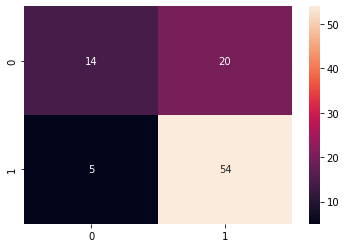

In [108]:
performance(y_test,X_test_scaled,model)

In [ ]:
# Inference:
# The KNN cladsifier worked best with the identified tuned parameters

In [110]:
model_list.append('KNN')
performance_list.append(0.73)

In [115]:
from sklearn.metrics import roc_curve,roc_auc_score

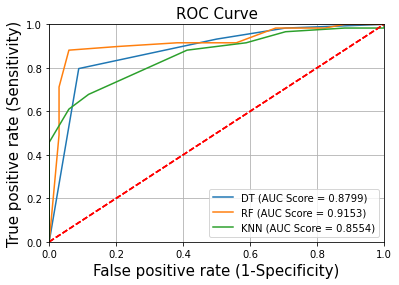

In [121]:
roc_plot(DT_model,X_test_scaled,y_test,'DT')
roc_plot(rf,X_test_scaled,y_test,'RF')
roc_plot(model,X_test_scaled,y_test,'KNN')

In [122]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00       151

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217

AUC score: 1.0


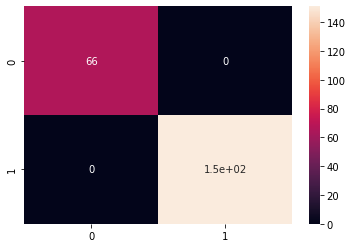

In [123]:
performance(y_train,X_train_scaled,xgb_model)

In [ ]:
# This is an overfit model

In [124]:
y.value_counts()

1    210
0    100
Name: Status, dtype: int64

In [125]:
# The data is slightly imbalanced

In [78]:
X = back_data.drop('Status',axis=1)
y = back_data['Status']
y = y.astype('int')
X_train_scaled,X_test_scaled,y_train,y_test = data_preprocess(X,y)

In [79]:
y_train.value_counts()

1    151
0     66
Name: Status, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train,y_train = smt.fit_resample(X_train_scaled,y_train)

In [81]:
y_train.value_counts()

1    151
0    151
Name: Status, dtype: int64

In [136]:
    # Use Cross Validation To Evaluate Model
from sklearn.model_selection import cross_val_score
CV_Result = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())


[0.75409836 0.73770492 0.76666667 0.76666667 0.8       ]

0.7650273224043715

0.02046665123060392


In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state =1))
model_1 = RandomForestClassifier(random_state = 1)
model_2 = AdaBoostClassifier(random_state =1,n_estimators = 200)
model_3 = GradientBoostingClassifier(random_state =1, learning_rate= 0.2)
model_voter = VotingClassifier(estimators =[('BC',model), ('RF',model_1),('ABC',model_2),('GBC',model_3)], voting ='hard')
model_voter.fit(X_train,y_train)
model_voter.score(X_test,y_test)

0.7096774193548387

In [87]:
model_voter = VotingClassifier(estimators =[('BC',model), ('RF',model_1),('ABC',model_2),('GBC',model_3)], voting ='soft', weights = [1,1,2,3])
model_voter.fit(X_train,y_train)
model_voter.score(X_test,y_test)

0.7096774193548387

In [88]:
model_list.append('Voters')
performance_list.append(0.82)

In [89]:
print(model_list)
print(performance_list)

['Base LR', 'LR_scaled', 'DT', 'Voters']
[0.89, 0.87, 0.77, 0.82]


In [90]:
performance_df = pd.DataFrame({'Model':model_list,'Performance':performance_list})
performance_df = performance_df.sort_values('Performance',ascending=False)
performance_df

,Model,Performance
0,Base LR,0.89
1,LR_scaled,0.87
3,Voters,0.82
2,DT,0.77


<AxesSubplot:>

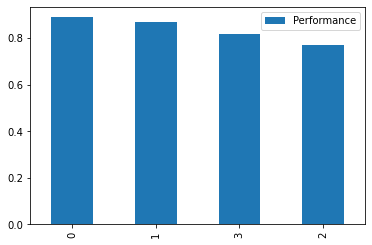

In [91]:
performance_df.plot(kind='bar')